In [75]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"/home/kyo/Downloads/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [76]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


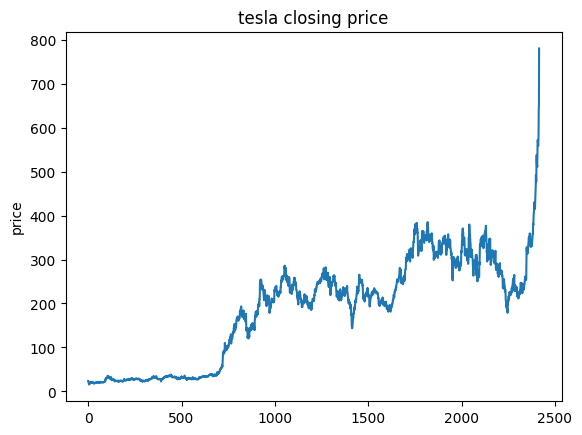

In [77]:
plt.title("tesla closing price")
plt.ylabel("price")
plt.plot(df['Close'])
plt.show()

In [78]:
#adj close and close have exact same values so we can just merge into close
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [79]:
df = df.drop(['Adj Close'], axis=1)


In [80]:
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


In [81]:
#check for null values
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

/tmp/ipykernel_7748/2146054422.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)
/tmp/ipykernel_7748/2146054422.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/tmp/ipykernel_7748/2146054422.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use

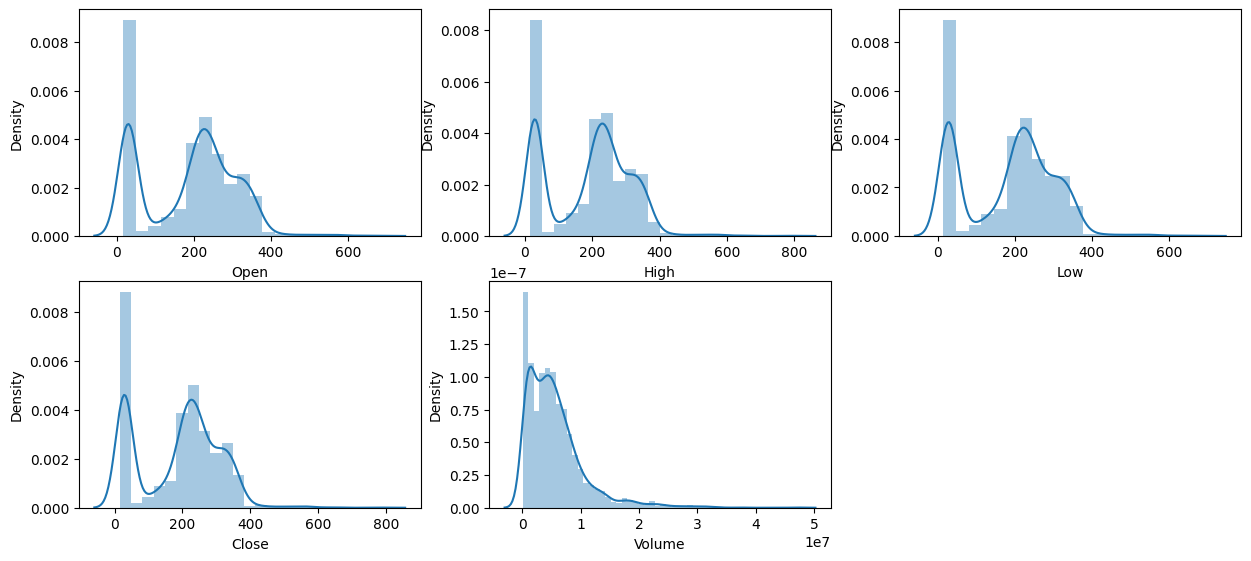

In [82]:
#plotting the graphs
features = ['Open', 'High', 'Low', 'Close', 'Volume']#features to plot
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sb.distplot(df[col])
plt.show()

In [83]:
#we've to see how the data varies with time as we cant just pass date as an argument
split_date = df['Date'].str.split('-', expand=True)

df['Year'] = split_date[0].astype('int')
df['Month'] = split_date[1].astype('int')
df['Day'] = split_date[2].astype('int')

df

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,2010,7,6
...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500,2020,1,28
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500,2020,1,29
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700,2020,1,30
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300,2020,1,31


/tmp/ipykernel_7748/2274563621.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df.groupby('Year').mean()#group the data by the year
/tmp/ipykernel_7748/2274563621.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


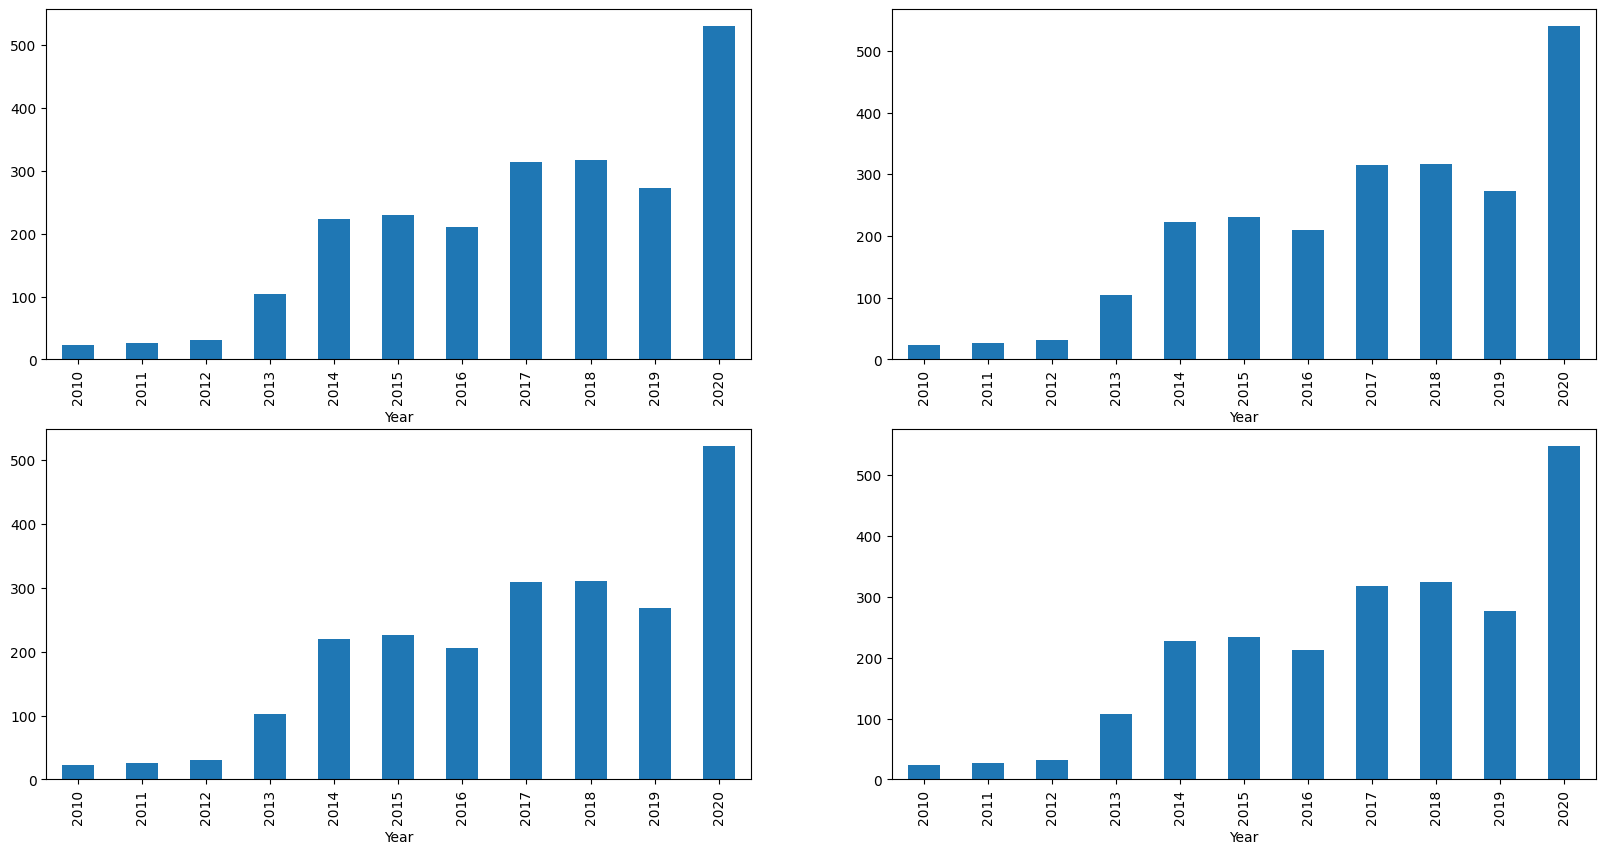

In [84]:
#plot the data according to the year
group = df.groupby('Year').mean()#group the data by the year
new_features = ['Open', 'Close', 'Low', 'High']
plt.subplots(figsize=(20, 10))

for i,col in enumerate(new_features):
    plt.subplot(2, 2, i+1)
    group[col].plot.bar()
plt.show()
#we can see that from all 4 graphs stock prices doubled from 2013 to 2014

In [85]:
df = df.drop(['Date'], axis=1)
df = df.drop(['Day'], axis=1)
df = df.drop(['Month'], axis=1)


In [86]:
df

,Open,High,Low,Close,Volume,Year
0,19.000000,25.000000,17.540001,23.889999,18766300,2010
1,25.790001,30.420000,23.299999,23.830000,17187100,2010
2,25.000000,25.920000,20.270000,21.959999,8218800,2010
3,23.000000,23.100000,18.709999,19.200001,5139800,2010
4,20.000000,20.000000,15.830000,16.110001,6866900,2010
...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500,2020
2412,575.690002,589.799988,567.429993,580.989990,17801500,2020
2413,632.419983,650.880005,618.000000,640.809998,29005700,2020
2414,640.000000,653.000000,632.520020,650.570007,15719300,2020


In [141]:
data_filtered = df.filter('Close')
print(data_filtered)
dataset = df.values
training_data_len = len(dataset)
training_data_len

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2416 rows x 0 columns]


2416

In [88]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)
print(scaled_data.shape)


[[0.00434948 0.01087705 0.00388739 0.01058623 0.39721385 0.        ]
 [0.01467569 0.0179205  0.01263401 0.01050772 0.36357556 0.        ]
 [0.01347426 0.01207262 0.00803292 0.00806072 0.17254321 0.        ]
 ...
 [0.93723668 0.8242258  0.91569226 0.81786181 0.6153217  1.        ]
 [0.94876435 0.82698079 0.93774107 0.83063335 0.33231018 1.        ]
 [1.         1.         1.         1.         1.         1.        ]]
(2416, 6)


In [89]:
#prepare what data you want to train
train_data = scaled_data[0:training_data_len, :1]
x_train = []
y_train = []
for i  in range(60, len(train_data)):
    #x_train will have the values of past 60 data
    x_train.append(train_data[i-60:i, 0])
    #y_train will have the possible to be predicted 61st value
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.00434948, 0.01467569, 0.01347426, 0.01043267, 0.00587028,
       0.00039541, 0.        , 0.00218995, 0.00275265, 0.001901  ,
       0.00273744, 0.00577903, 0.00693484, 0.00795377, 0.00868375,
       0.006874  , 0.00663068, 0.00768003, 0.00815147, 0.0072542 ,
       0.00670671, 0.00704129, 0.00617444, 0.00663068, 0.00739107,
       0.00883583, 0.00821231, 0.00602236, 0.0057182 , 0.005338  ,
       0.00387804, 0.00252452, 0.00310243, 0.00351304, 0.00428865,
       0.00524675, 0.00364992, 0.0038172 , 0.00448635, 0.00472968,
       0.00459281, 0.00570299, 0.00549008, 0.00541404, 0.00535321,
       0.00529238, 0.00643297, 0.00719337, 0.00679797, 0.006874  ,
       0.00739107, 0.00701088, 0.00722379, 0.00669151, 0.00736066,
       0.00913999, 0.00742149, 0.00688921, 0.00722379, 0.00719337])]
[0.00570298833988447]


In [96]:
#LSTM model only accepts numpy arrays and only accepts 3D arrays so we have to reshape
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (2356, 60, 1))
print(x_train)
print(y_train)

[[[0.00434948]
  [0.01467569]
  [0.01347426]
  ...
  [0.00688921]
  [0.00722379]
  [0.00719337]]

 [[0.01467569]
  [0.01347426]
  [0.01043267]
  ...
  [0.00722379]
  [0.00719337]
  [0.00570299]]

 [[0.01347426]
  [0.01043267]
  [0.00587028]
  ...
  [0.00719337]
  [0.00570299]
  [0.00579424]]

 ...

 [[0.45651282]
  [0.45420118]
  [0.46153143]
  ...
  [0.79971103]
  [0.84001215]
  [0.8509619 ]]

 [[0.45420118]
  [0.46153143]
  [0.45906775]
  ...
  [0.84001215]
  [0.8509619 ]
  [0.93723668]]

 [[0.46153143]
  [0.45906775]
  [0.47600945]
  ...
  [0.8509619 ]
  [0.93723668]
  [0.94876435]]]
[0.00570299 0.00579424 0.0064786  ... 0.93723668 0.94876435 1.        ]


In [91]:
print(x_train.shape)
print(y_train.shape)

(2356, 60, 1)
(2356,)


In [92]:
#building the LSTM model
model = Sequential()
#make an lstm model with 50 neurons, return sequence true means we want to use lstm again, false means we dont
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50, return_sequences=False))
#this is dense layers with number of neurons we want to add
model.add(Dense(25))
model.add(Dense(1))

In [93]:
#execute the model and optimizer basically optimizes the loss which tells how much the loss function is
model.compile(optimizer='adam', loss='mean_squared_error')
#batch size means how much we've to train, epoch is how many times we have to go back and forth through the data
model.fit(x_train, y_train, batch_size=1, epochs=1)

2356/2356 [==============================] - 102s 42ms/step - loss: 9.8950e-04


In [112]:
#create test data set
test_data = scaled_data[training_data_len - 100:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
print(x_test)
print(y_test)
    

[[0.33646111 0.35215572 0.35103035 ... 0.47640483 0.48130179 0.48910349]
 [0.35215572 0.35103035 0.34957037 ... 0.48130179 0.48910349 0.48162115]
 [0.35103035 0.34957037 0.34420196 ... 0.48910349 0.48162115 0.4849213 ]
 ...
 [0.45651282 0.45420118 0.46153143 ... 0.79971103 0.84001215 0.8509619 ]
 [0.45420118 0.46153143 0.45906775 ... 0.84001215 0.8509619  0.93723668]
 [0.46153143 0.45906775 0.47600945 ... 0.8509619  0.93723668 0.94876435]]
[]


In [114]:
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
print(y_test.shape)
#x_test.shape[0] is number of samples and x_test.shape[1] is number of time steps


(40, 60, 1)
(0, 6)


In [125]:
prediction = model.predict(x_test)
#now we inverse transform as the data till now was scaled and now we get the actual predicted value
predict_dataset_like = np.zeros(shape=(len(prediction), 6) )
predict_dataset_like[:,0] = prediction[:,0]
# inverse transform and then select the right field
prediction = scaler.inverse_transform(predict_dataset_like)[:,0]
print(prediction)


[327.56496926 328.14120485 328.98332598 330.09344909 331.80696855
 336.00148547 341.00953221 346.64243349 351.63409754 358.88214377
 365.83455694 374.87007988 385.67897005 395.19096272 403.5353165
 411.64941121 419.42711211 423.88226271 420.52980813 419.11270559
 422.32841567 426.80900255 435.73988009 447.38816748 463.06530284
 473.27865485 481.72604712 499.35425092 513.10587169 513.67758048
 512.05671335 514.99376096 528.9914356  542.44644349 554.34615419
 555.84042782 559.27252264 564.12532577 582.3132061  603.347167  ]


In [120]:
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

ValueError: operands could not be broadcast together with shapes (40,1) (0,6) 

In [132]:
print(df)

            Open        High         Low       Close    Volume  Year
0      19.000000   25.000000   17.540001   23.889999  18766300  2010
1      25.790001   30.420000   23.299999   23.830000  17187100  2010
2      25.000000   25.920000   20.270000   21.959999   8218800  2010
3      23.000000   23.100000   18.709999   19.200001   5139800  2010
4      20.000000   20.000000   15.830000   16.110001   6866900  2010
...          ...         ...         ...         ...       ...   ...
2411  568.489990  576.809998  558.080017  566.900024  11788500  2020
2412  575.690002  589.799988  567.429993  580.989990  17801500  2020
2413  632.419983  650.880005  618.000000  640.809998  29005700  2020
2414  640.000000  653.000000  632.520020  650.570007  15719300  2020
2415  673.690002  786.140015  673.520020  780.000000  47065000  2020

[2416 rows x 6 columns]


/tmp/ipykernel_7748/1655271503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


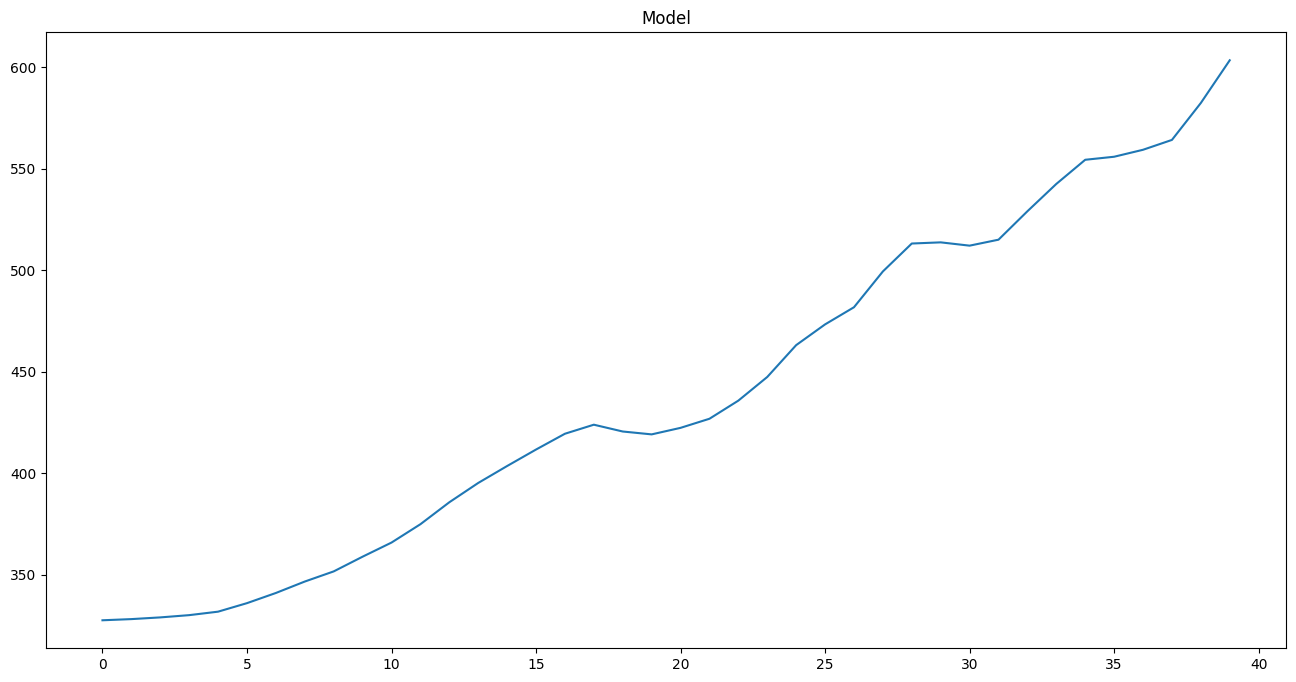

In [144]:
train = data_filtered[:training_data_len]
valid = data_filtered[training_data_len:]
valid['Predictions'] = prediction
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.plot(train)
plt.plot(valid[['Predictions']])